In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
covid_df = pd.read_csv('india_covid.csv')

In [3]:
covid_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,1/30/2020,6:00 PM,Kerala,1,0,0,0,1
1,2,1/31/2020,6:00 PM,Kerala,1,0,0,0,1
2,3,2/1/2020,6:00 PM,Kerala,2,0,0,0,2
3,4,2/2/2020,6:00 PM,Kerala,3,0,0,0,3
4,5,2/3/2020,6:00 PM,Kerala,3,0,0,0,3


In [4]:
covid_df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,8/11/2021,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,8/11/2021,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,8/11/2021,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,8/11/2021,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,8/11/2021,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [5]:
covid_df.shape

(18110, 9)

In [6]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


## Data Cleaning

In [7]:
covid_df['Date']=pd.to_datetime(covid_df['Date'])

In [8]:
covid_df.dtypes

Sno                                  int64
Date                        datetime64[ns]
Time                                object
State/UnionTerritory                object
ConfirmedIndianNational             object
ConfirmedForeignNational            object
Cured                                int64
Deaths                               int64
Confirmed                            int64
dtype: object

In [9]:
covid_df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [10]:
covid_new=covid_df.drop(columns=['Sno','Time','ConfirmedForeignNational','ConfirmedIndianNational'],axis=1)

In [11]:
covid_new.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [12]:
covid_new['Active_cases'] = covid_new['Confirmed']-covid_new['Cured']-covid_new['Deaths']

In [13]:
covid_new.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [14]:
covid_finaldf=covid_new.rename(columns={'State/UnionTerritory':'States','Cured':'Recovered'})

In [15]:
covid_finaldf.head()

,Date,States,Recovered,Deaths,Confirmed,Active_cases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


## Finding Missing Value

In [16]:
covid_finaldf.isnull().sum()

Date            0
States          0
Recovered       0
Deaths          0
Confirmed       0
Active_cases    0
dtype: int64

In [17]:
covid_finaldf['Recovery Rate'] = covid_finaldf['Recovered']*100/covid_finaldf['Confirmed']

In [18]:
covid_finaldf['Death Rate'] = covid_finaldf['Deaths']*100/covid_finaldf['Confirmed']

In [19]:
covid_finaldf['Month'] = covid_finaldf['Date'].dt.month_name()

In [20]:
covid_finaldf.head()

,Date,States,Recovered,Deaths,Confirmed,Active_cases,Recovery Rate,Death Rate,Month
0,2020-01-30,Kerala,0,0,1,1,0.0,0.0,January
1,2020-01-31,Kerala,0,0,1,1,0.0,0.0,January
2,2020-02-01,Kerala,0,0,2,2,0.0,0.0,February
3,2020-02-02,Kerala,0,0,3,3,0.0,0.0,February
4,2020-02-03,Kerala,0,0,3,3,0.0,0.0,February


In [21]:
Total_active_cases = covid_finaldf.groupby('States')['Active_cases'].aggregate(max).sort_values(ascending=False).reset_index()

In [22]:
Total_active_cases

,States,Active_cases
0,Maharashtra,701614
1,Karnataka,605515
2,Kerala,445692
3,Tamil Nadu,313048
4,Uttar Pradesh,310783
5,Rajasthan,212753
6,Andhra Pradesh,211554
7,Gujarat,148297
8,West Bengal,132181
9,Chhattisgarh,131245


In [23]:
Total_death_cases = covid_finaldf.groupby('States')['Deaths'].aggregate(max).sort_values(ascending=False).reset_index()

In [24]:
Total_death_cases

,States,Deaths
0,Maharashtra,134201
1,Maharashtra***,130753
2,Karnataka,36848
3,Karanataka,36197
4,Tamil Nadu,34367
5,Delhi,25068
6,Uttar Pradesh,22775
7,West Bengal,18252
8,Kerala,18004
9,Punjab,16322


## Data Visulization

## Bivariate Analysis

In [25]:
# Grouping Top States With Active_cases 
top_10_activecases = covid_finaldf.groupby(by='States').max()[['Active_cases','Date']].sort_values(by=['Active_cases'],ascending=False).reset_index()

Text(0, 0.5, 'Active_cases')

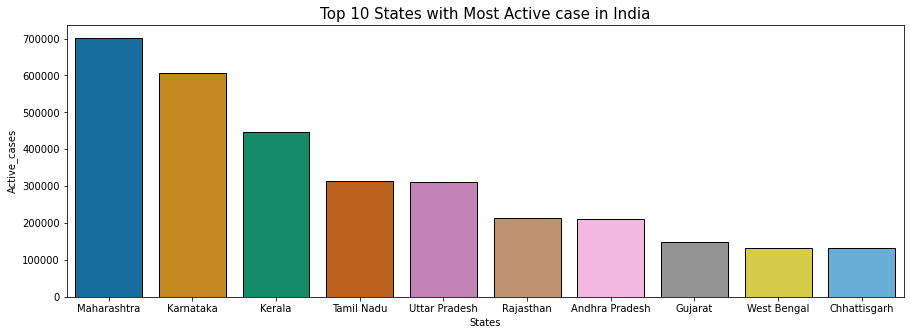

In [26]:
plt.figure(figsize=(15,5))
plt.title('Top 10 States with Most Active case in India',size=15)
sns.barplot(x='States',y='Active_cases',data=top_10_activecases.iloc[:10], palette ='colorblind',edgecolor='black')
plt.xlabel('States')
plt.ylabel('Active_cases')

In [27]:
# Grouping Top States With Deaths 
top_10_deaths = covid_finaldf.groupby(by='States').max()[['Deaths','Date']].sort_values(by=['Deaths'],ascending=False).reset_index()

Text(0, 0.5, 'No of Deaths')

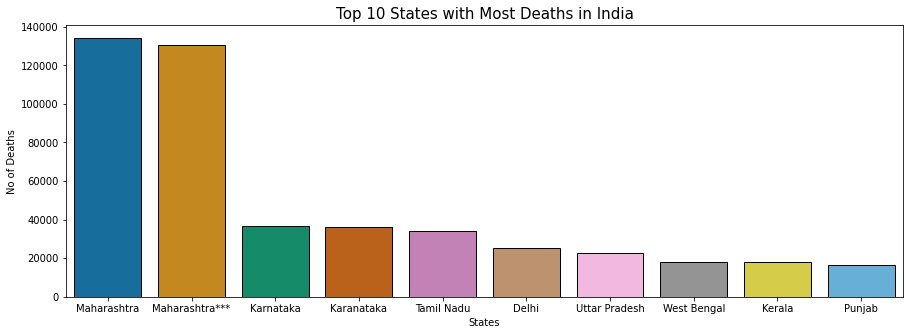

In [28]:
plt.figure(figsize=(15,5))
plt.title('Top 10 States with Most Deaths in India',size=15)
sns.barplot(x='States',y='Deaths',data=top_10_deaths.iloc[:10], palette ='colorblind',edgecolor='black')
plt.xlabel('States')
plt.ylabel('No of Deaths')

Text(0, 0.5, 'Active Cases')

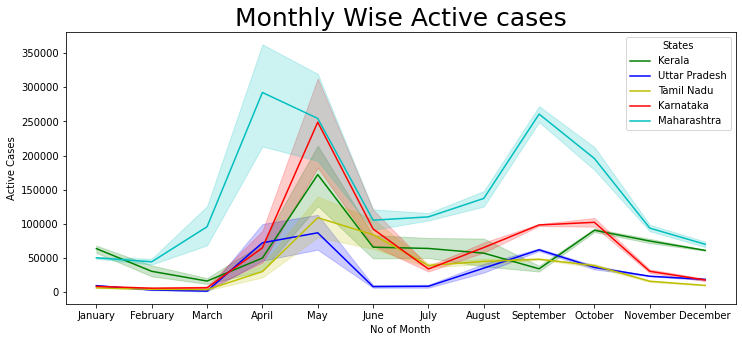

In [29]:
top_states = covid_finaldf[covid_finaldf['States'].isin(['Maharashtra','Karnataka','Kerala','Tamil Nadu','Uttar Pradesh'])]
plt.figure(figsize=(12,5))
sns.lineplot(x='Month',y='Active_cases',hue='States',data=top_states,palette=['g', 'b','y','r','c'])
plt.title('Monthly Wise Active cases',size=25)
plt.xlabel('No of Month')
plt.ylabel('Active Cases')

Text(0, 0.5, 'Confirmed Cases')

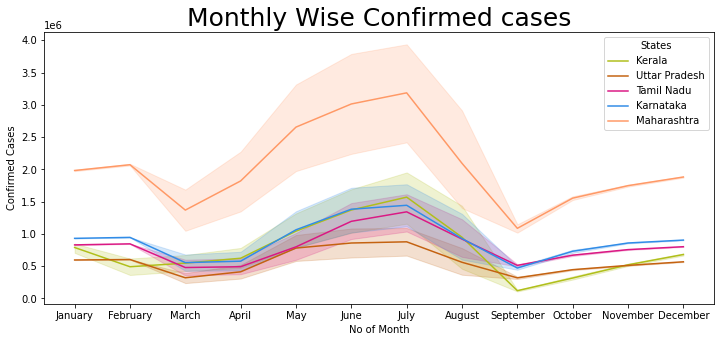

In [30]:
top_states = covid_finaldf[covid_finaldf['States'].isin(['Maharashtra','Karnataka','Kerala','Tamil Nadu','Uttar Pradesh'])]
plt.figure(figsize=(12,5))
sns.lineplot(x='Month',y='Confirmed',hue='States',data=top_states,palette=['#B0BF1A', '#C46210','#DA1884','#318CE7','#FF9966'])
plt.title('Monthly Wise Confirmed cases',size=25)
plt.xlabel('No of Month')
plt.ylabel('Confirmed Cases')

Text(0, 0.5, 'Deaths Cases')

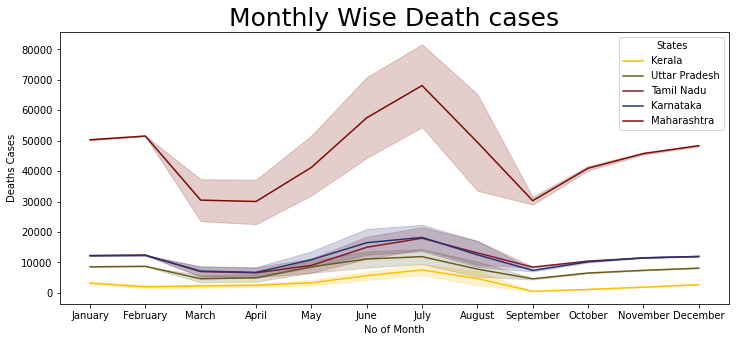

In [31]:
top_states = covid_finaldf[covid_finaldf['States'].isin(['Maharashtra','Karnataka','Kerala','Tamil Nadu','Uttar Pradesh'])]
plt.figure(figsize=(12,5))
sns.lineplot(x='Month',y='Deaths',hue='States',data=top_states,palette=['#FFBF00','#665D1E','#841B2D','#27346F','#7C0A02'])
plt.title('Monthly Wise Death cases',size=25)
plt.xlabel('No of Month')
plt.ylabel('Deaths Cases')

Text(0, 0.5, 'Recovery Rate')

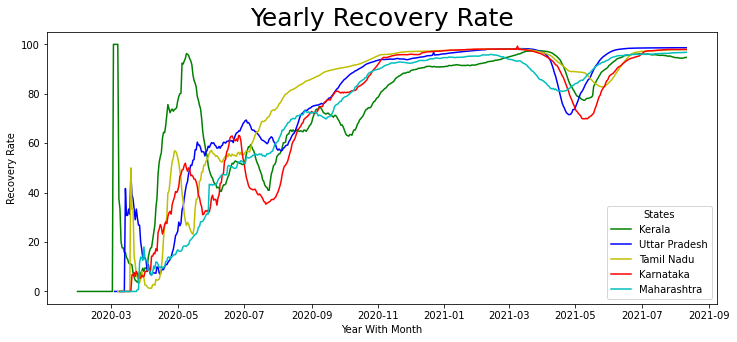

In [32]:
top_states = covid_finaldf[covid_finaldf['States'].isin(['Maharashtra','Karnataka','Kerala','Tamil Nadu','Uttar Pradesh'])]
plt.figure(figsize=(12,5))
sns.lineplot(x='Date',y='Recovery Rate',hue='States',data=top_states,palette=['g', 'b','y','r','c'])
plt.title('Yearly Recovery Rate',size=25)
plt.xlabel('Year With Month')
plt.ylabel('Recovery Rate')

Text(0, 0.5, 'Death Rate')

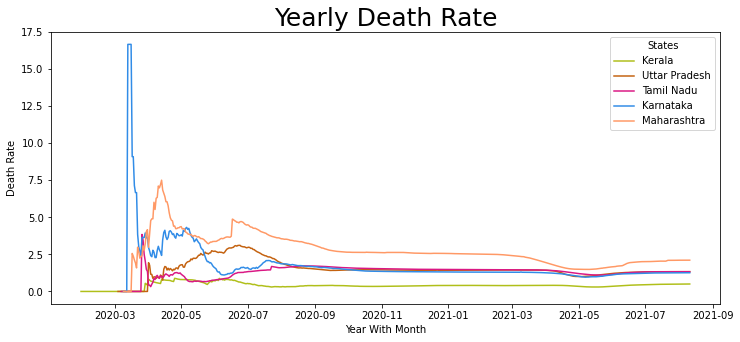

In [33]:
top_states = covid_finaldf[covid_finaldf['States'].isin(['Maharashtra','Karnataka','Kerala','Tamil Nadu','Uttar Pradesh'])]
plt.figure(figsize=(12,5))
sns.lineplot(x='Date',y='Death Rate',hue='States',data=top_states,palette=['#B0BF1A', '#C46210','#DA1884','#318CE7','#FF9966'])
plt.title('Yearly Death Rate',size=25)
plt.xlabel('Year With Month')
plt.ylabel('Death Rate')

In [34]:
statewise = pd.pivot_table(covid_finaldf,values=['Confirmed','Deaths','Recovered'],index='States',aggfunc=max)

In [35]:
statewise['Recovery Rate'] = statewise['Recovered']*100/statewise['Confirmed']

In [36]:
statewise['Death Rate'] = statewise['Deaths']*100/statewise['Confirmed']

In [37]:
statewise = statewise.sort_values(by = 'Confirmed',ascending = False)

In [38]:
statewise.style.background_gradient(cmap = 'twilight')

,Confirmed,Deaths,Recovered,Recovery Rate,Death Rate
States,,,,,
Maharashtra,6363442,134201,6159676,96.797865,2.108937
Maharashtra***,6229596,130753,6000911,96.329056,2.098900
Kerala,3586693,18004,3396184,94.688450,0.501967
Karnataka,2921049,36848,2861499,97.961349,1.261465
Karanataka,2885238,36197,2821491,97.790581,1.254559
Tamil Nadu,2579130,34367,2524400,97.877967,1.332504
Andhra Pradesh,1985182,13564,1952736,98.365591,0.683262
Uttar Pradesh,1708812,22775,1685492,98.635309,1.332797
West Bengal,1534999,18252,1506532,98.145471,1.189056


## Multivariate Analysis

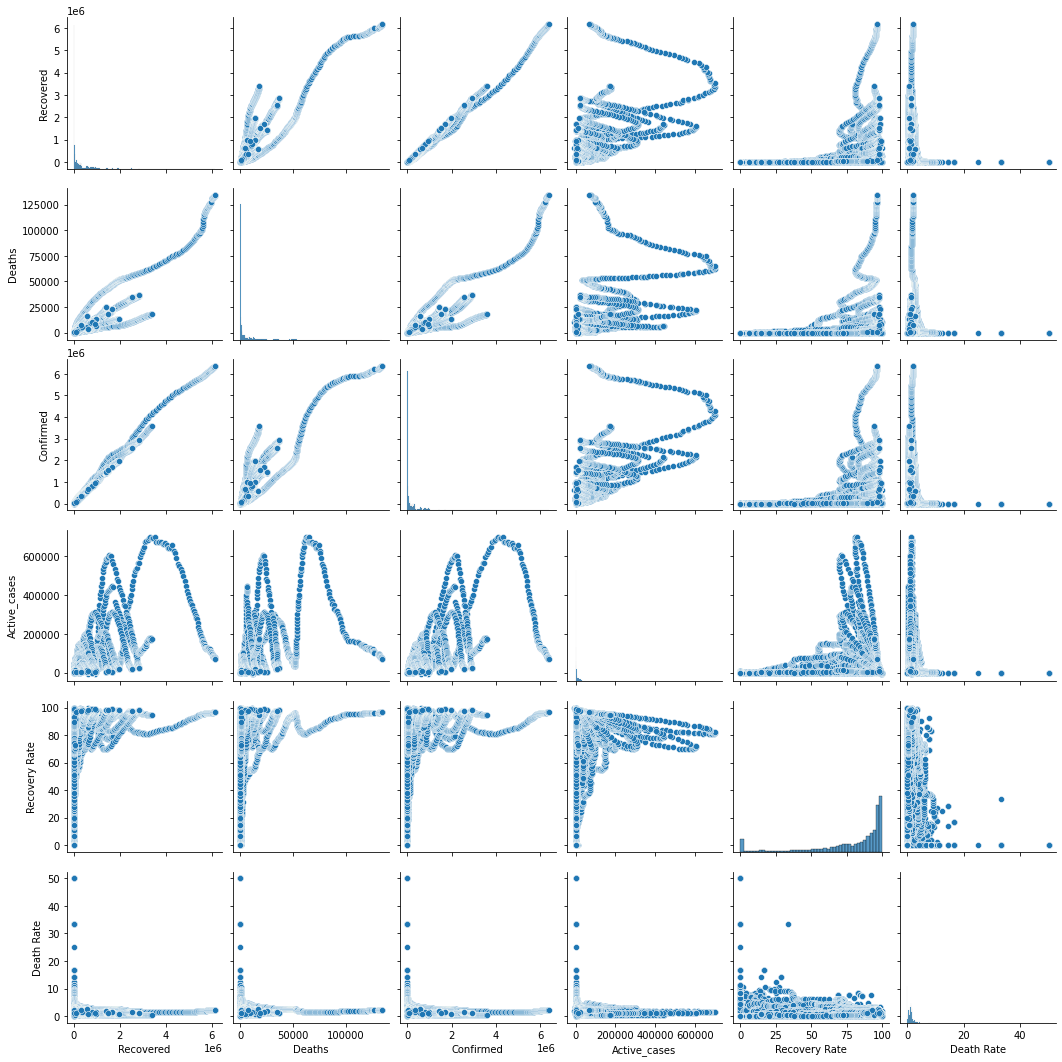

In [47]:
sns.pairplot(covid_finaldf)